### **Installation and Imports**
*I initially ran*:
``` bash
pip install neurokit2
```
- This didn't seem to do the trick for me, as I had some potential corruptions in my environment, and also network timeouts, among other potential issues. If you run into the same issue. Running the following commands in your terminal can help:
```bash
pip uninstall neurokit2
pip install neurokit2
pip install PyWavelets
```

In [3]:
import neurokit2 as nk

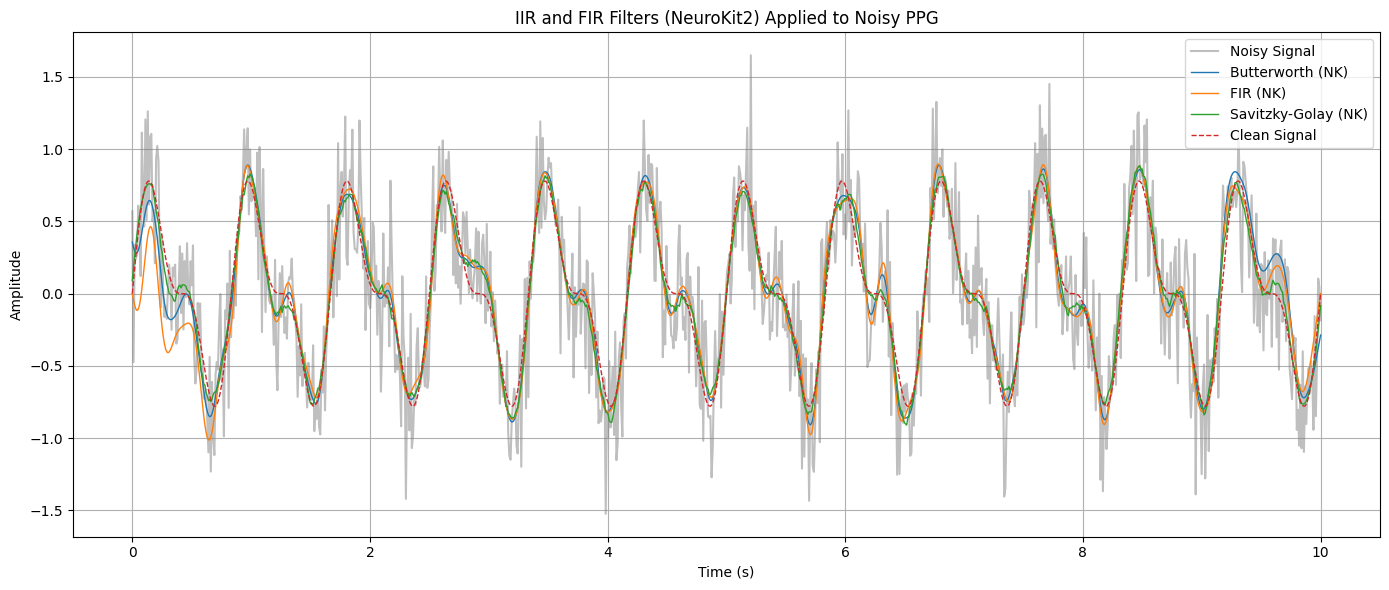

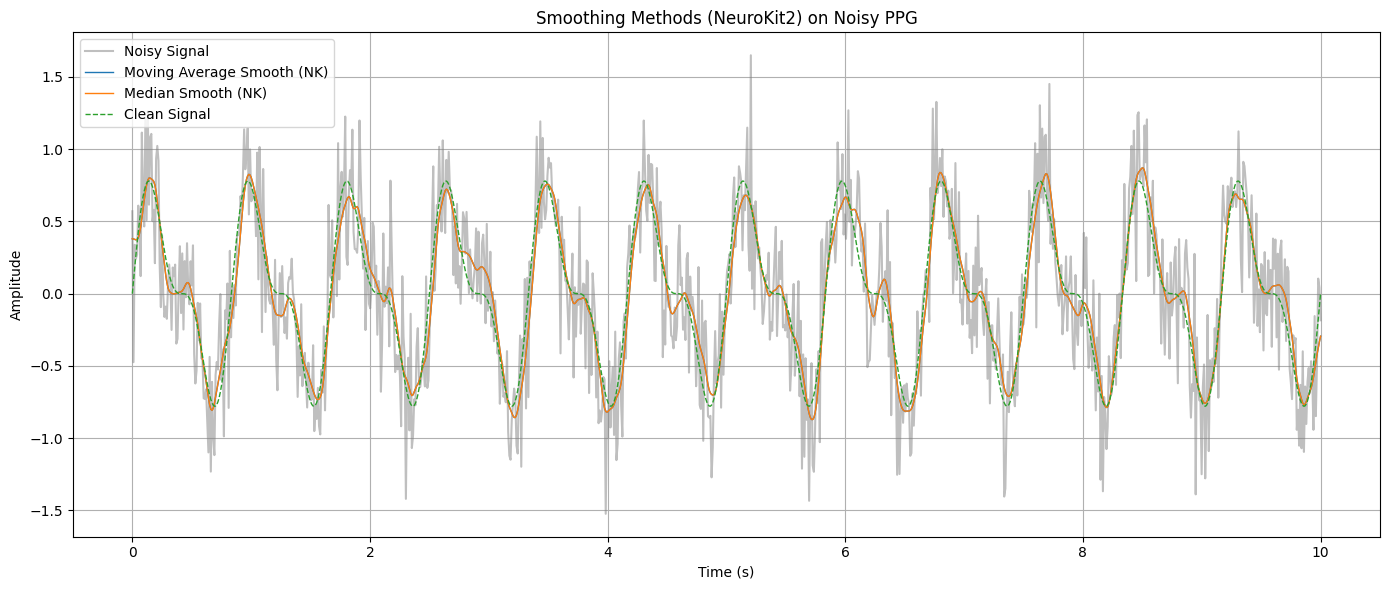

In [8]:
# PPG Signal Filtering: FIR vs IIR Filter Comparison using NeuroKit2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

# Sampling rate and time axis
fs = 100
T = 10  # seconds
t = np.linspace(0, T, fs * T)

# Clean synthetic PPG signal
ppg_clean = 0.6 * np.sin(2 * np.pi * 1.2 * t) + 0.3 * np.sin(2 * np.pi * 2.4 * t)
noise = 0.3 * np.random.randn(len(t))
ppg_noisy = ppg_clean + noise

# Apply NeuroKit2 filters (uses bandpass filtering internally)
ppg_butter = nk.signal_filter(ppg_noisy, sampling_rate=fs, lowcut=0.5, highcut=5, method='butterworth')
ppg_fir = nk.signal_filter(ppg_noisy, sampling_rate=fs, lowcut=0.5, highcut=5, method='fir')
ppg_savgol = nk.signal_filter(ppg_noisy, sampling_rate=fs, method='savgol')

# Smoothing with NeuroKit2
ppg_smooth = nk.signal_smooth(ppg_noisy, method='moving_average')  # No window size allowed explicitly
ppg_median = nk.signal_smooth(ppg_noisy, method='median')  # Same here

# Plotting IIR and FIR Filters (Grouped)
plt.figure(figsize=(14, 6))
plt.plot(t, ppg_noisy, label='Noisy Signal', color='gray', alpha=0.5)
plt.plot(t, ppg_butter, label='Butterworth (NK)', linewidth=1)
plt.plot(t, ppg_fir, label='FIR (NK)', linewidth=1)
plt.plot(t, ppg_savgol, label='Savitzky-Golay (NK)', linewidth=1)
plt.plot(t, ppg_clean, label='Clean Signal', linestyle='--', linewidth=1)
plt.legend()
plt.title('IIR and FIR Filters (NeuroKit2) Applied to Noisy PPG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting NeuroKit2 Smoothing Techniques
plt.figure(figsize=(14, 6))
plt.plot(t, ppg_noisy, label='Noisy Signal', color='gray', alpha=0.5)
plt.plot(t, ppg_smooth, label='Moving Average Smooth (NK)', linewidth=1)
plt.plot(t, ppg_median, label='Median Smooth (NK)', linewidth=1)
plt.plot(t, ppg_clean, label='Clean Signal', linestyle='--', linewidth=1)
plt.legend()
plt.title('Smoothing Methods (NeuroKit2) on Noisy PPG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()